# TFM: INTERPOLACIÓN
## Degradación de un sistema fotovoltáico 
## Luis Julián García Giménez

rdtools en el sistema!
Lista CSVs
['Aleria_UCM_18.csv', 'Aleria_UCM_19.csv', 'Aleria_UCM_20.csv', 'Aleria_UCM_12.csv', 'Aleria_UCM_13.csv', 'Aleria_UCM_17.csv', 'Aleria_UCM_16.csv', 'Aleria_UCM_14.csv', 'Aleria_UCM_15.csv']

Lista ordenada
['Aleria_UCM_12.csv', 'Aleria_UCM_13.csv', 'Aleria_UCM_14.csv', 'Aleria_UCM_15.csv', 'Aleria_UCM_16.csv', 'Aleria_UCM_17.csv', 'Aleria_UCM_18.csv', 'Aleria_UCM_19.csv', 'Aleria_UCM_20.csv']

Hay 9 CSVs. Es decir 9 años



/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3,6,9,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,



Filas: 315621
Tenemos: 315621 filas y 17 columnas. Es decir: 5365557 datos

Columnas
['Fecha' 'Icc_11' 'Vcc_11' 'Pac_11' 'Icc_12' 'Vcc_12' 'Pac_12' 'Icc_13'
 'Vcc_13' 'Pca_13' 'Icc_14' 'Vcc_14' 'Pca_14' 'RadPanel_1' 'RadPanel_2'
 'TempMod_1' 'TempMod_2']

Campo solar 1

df_A11
                   Fecha  Pcc_11 RadPanel_1 RadPanel_2  TempMod_1  TempMod_2
0          1/1/2012 0:15     NaN        NaN        NaN        NaN        NaN
1          1/1/2012 0:30     NaN        NaN        NaN        NaN        NaN
2          1/1/2012 0:45     NaN        NaN        NaN        NaN        NaN
3          1/1/2012 1:00     NaN        NaN        NaN        NaN        NaN
4          1/1/2012 1:15     NaN        NaN        NaN        NaN        NaN
...                  ...     ...        ...        ...        ...        ...
315616  12/31/2020 23:00     NaN          0       0.24       1.75       1.59
315617  12/31/2020 23:15     NaN          0       0.24       2.76       2.63
315618  12/31/2020 23:30    

Despues de quitar los nan y sin 2012, hay en df1:  112179 filas
Se han eliminado en df1: 152278 filas con NaN
Por lo tanto se han eliminado el: 57.58138374102406 % de filas de df1
-------------------------------------


-------------------------------------
REALIZAMOS LA MEDIA DE LOS SENSORES DE RADIACIÓN Y TEMPERATURA
Creamos una única columna de radiación que sea la media de los dos sensores de radiación (columnas poa y poa2)
Creamos una única columna de temperatura que sea la media de los dos sensores de temperatura (columnas Tcell y Tcell2)

media_poa_temp

media_poa_temp

media_poa_temp

media_poa_temp
-------------------------------------

-------------------------------------
Esto es para comprobar que tras eliminar los NaN, no queda ninguno
False = No hay ningún nulo / True = Hay algún nulo
comprobacion df1 no interpolado False
comprobacion df2 no interpolado False
comprobacion df3 no interpolado False
comprobacion df4 no interpolado False
-------------------------------------


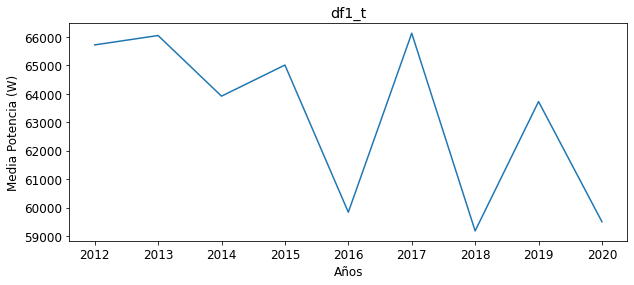

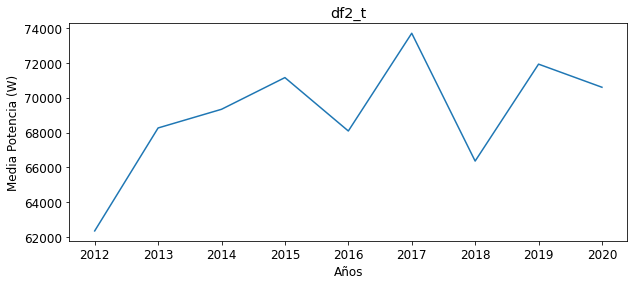

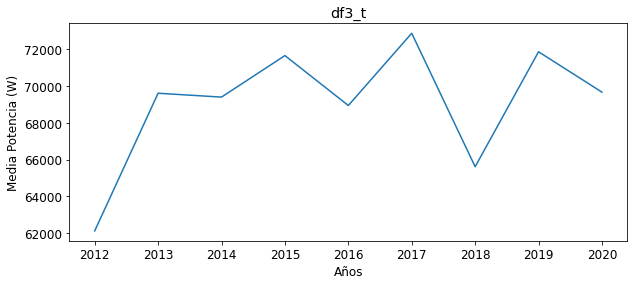

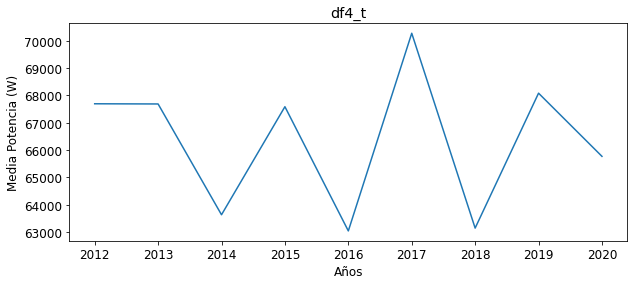

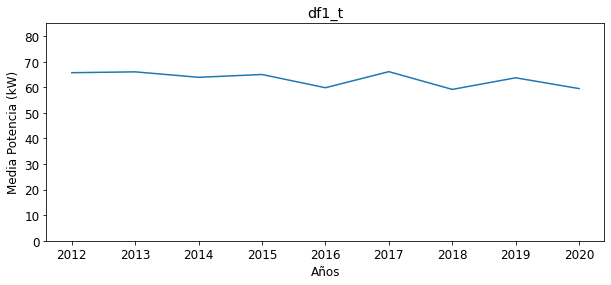

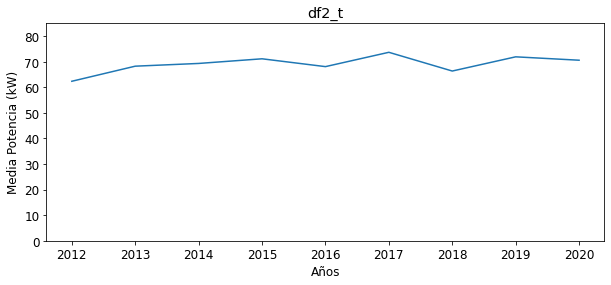

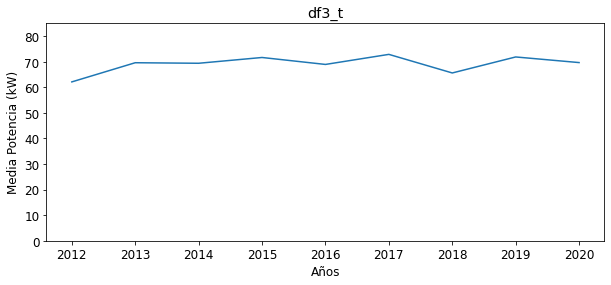

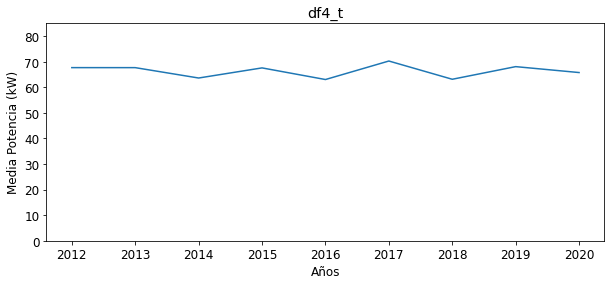

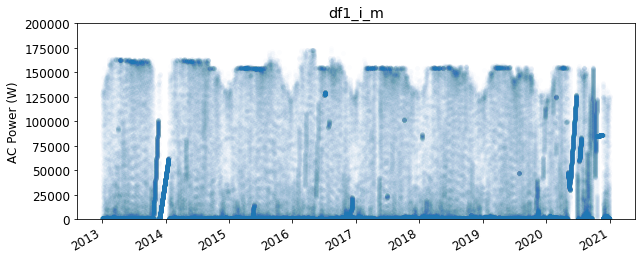

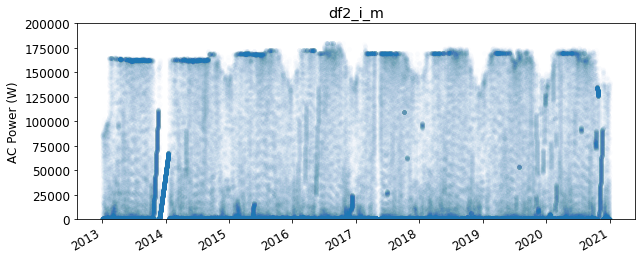

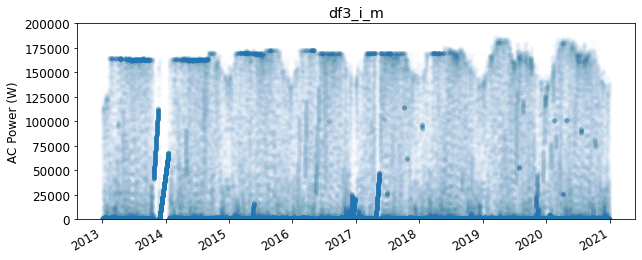

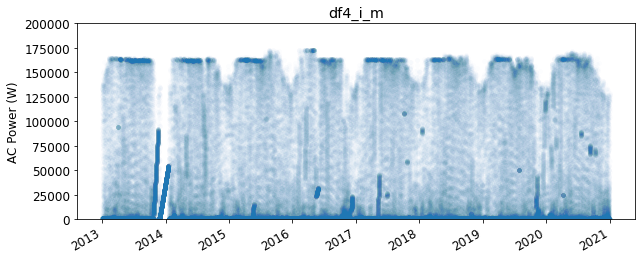

In [11]:
import sys
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pvlib
import rdtools
%matplotlib inline
import matplotlib
import os
from time import time

pd.options.mode.chained_assignment = None


try:
    import rdtools
    print("rdtools en el sistema!")
except ImportError as e:
    !{sys.executable} -m pip install --upgrade --user rdtools
    
    
#Update the style of plots
matplotlib.rcParams.update({'font.size': 12,
                           'figure.figsize': [4.5, 3],
                           'lines.markeredgewidth': 0,
                           'lines.markersize': 2
                           })

# Register time series plotting in pandas > 1.0
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set the random seed for numpy to ensure consistent results
np.random.seed(0)

#----------------------------------------------------------------
path='/Users/LuisGarcia/Desktop/TFM/OneDrive_1_19-2-2021/'


path_i='/Users/LuisGarcia/Desktop/TFM/interpolados_no_z_n_cc/'
path_ni='/Users/LuisGarcia/Desktop/TFM/no_interpolados_no_z_n_cc/'
path_ima='/Users/LuisGarcia/Desktop/TFM/imagenes_no_z_n_cc/preprocesado_0/'


csvs = os.listdir(path)
print("Lista CSVs")
print(csvs)
print()
print("Lista ordenada")
csvs.sort()
print(csvs)

años=len(csvs)
print()
print("Hay " + str(años) + " CSVs. Es decir " + str(años) + " años")
print()

suma_filas=0
dfs=[]
for i in csvs:
    ruta= path + i
    df=pd.read_csv(ruta, encoding='latin-1')
    filas=len(df)
    suma_filas=suma_filas+filas
    dfs.append(df)


df_A = pd.concat(dfs, ignore_index=True)

tamaño=df_A.size

print()
print("Filas: " + str(suma_filas)) #suma_filas debe ser igual a filas_totales en df_A

columnas=len(df_A.columns)
print("Tenemos: " + str(filas_totales) + " filas y " + str(columnas) +" columnas. Es decir: " + str(tamaño) + " datos")

columns_names = df_A.columns.values
print()
print("Columnas")
print(columns_names)
print()

#RadPanel_1' 'RadPanel_2' son las medidas de 2 sensores en plano del panel. Por lo tanto la radiacion en ambas columnas debería ser similar, ya que la planta es pequeña.
#También hay medidas en el plano horizontal, las cuales se pueden transformar.

#Con la temperatura ocurre lo mísmo. Pero a lo mejor es más susceptible por el viento.

#----------------------------------------------------------------

#TENEMOS 4 MODULOS. DIVIDIMOS LOS DATOS EN MODULOS.
#LA V y I no nos interesan, la potencia sí.
df_A["Pcc_11"]= df_A["Vcc_11"] * df_A["Icc_11"]
df_A["Pcc_12"]= df_A["Vcc_12"] * df_A["Icc_12"]
df_A["Pcc_13"]= df_A["Vcc_13"] * df_A["Icc_13"]
df_A["Pcc_14"]= df_A["Vcc_14"] * df_A["Icc_14"]


df_A = df_A.reindex(columns=['Fecha','Pcc_11','Icc_11','Vcc_11','Pac_11','Pcc_12','Icc_12','Vcc_12','Pac_12','Pcc_13','Icc_13','Vcc_13','Pca_13','Pcc_14','Icc_14','Vcc_14','Pca_14','RadPanel_1','RadPanel_2','TempMod_1','TempMod_2'])

df_A11=df_A.drop(['Icc_11', 'Vcc_11','Pac_11','Icc_12','Vcc_12','Pac_12','Icc_13','Vcc_13','Pca_13','Icc_14','Vcc_14','Pca_14','Pcc_12','Pcc_13','Pcc_14'], axis=1)
df_A12=df_A.drop(['Icc_11','Vcc_11','Pac_11','Icc_12','Vcc_12','Pac_12','Icc_13','Vcc_13','Pca_13','Icc_14','Vcc_14','Pca_14', 'Pcc_11','Pcc_13','Pcc_14'], axis=1)
df_A13=df_A.drop(['Icc_11','Vcc_11','Pac_11','Icc_12','Vcc_12','Pac_12','Icc_13','Vcc_13','Pca_13','Icc_14','Vcc_14','Pca_14', 'Pcc_11','Pcc_12','Pcc_14'], axis=1)
df_A14=df_A.drop(['Icc_11','Vcc_11','Pac_11','Icc_12','Vcc_12','Pac_12','Icc_13','Vcc_13','Pca_13','Icc_14','Vcc_14','Pca_14', 'Pcc_11','Pcc_12','Pcc_13'], axis=1)

print("Campo solar 1")
print()
print("df_A11")
print(df_A11)
print()
'''
print("df_A12")
print(df_A12)
print()
print("df_A13")
print(df_A13)
print()
print("df_A14")
print(df_A14)
print()
'''


def renombrar(df_A):

    df = df_A
    try:
        df.columns = [col.decode('utf-8') for col in df.columns]
    except AttributeError:
        pass  
    
    columnas_r=df.columns.values
    p=columnas_r[1]
    
    rad1="RadPanel_1"
    rad2="RadPanel_2"
    temp1="TempMod_1"
    temp2="TempMod_2"
    
    df = df.rename(columns = {p: "power" , rad1: 'poa',rad2: 'poa2', temp1: 'Tcell',temp2: 'Tcell2','Fecha': 'Timestamp'})
    return df

#POA = RADIACIÓN

df1=renombrar(df_A11)
df2=renombrar(df_A12)
df3=renombrar(df_A13)
df4=renombrar(df_A14)


print("df1 tras renombrar las columnas ")
print()
print("df1")
print(df1)
print()


def convertir_tipos(df):
    
    df['Timestamp'] = pd.to_datetime(df.Timestamp)

    df['power'] = pd.to_numeric(df['power'], errors = 'coerce')
    df['poa'] = pd.to_numeric(df['poa'], errors = 'coerce')
    df['poa2'] = pd.to_numeric(df['poa2'], errors = 'coerce')
    df['Tcell'] = pd.to_numeric(df['Tcell'], errors = 'coerce')
    df['Tcell2'] = pd.to_numeric(df['Tcell2'], errors = 'coerce')

    return df

df1_t=convertir_tipos(df1)
df2_t =convertir_tipos(df2)
df3_t=convertir_tipos(df3)
df4_t=convertir_tipos(df4)

print("Tras hacer la conversión de tipo: df1_t")
print(df1_t)
#----------------------------------------------------------------
#CON LA GRÁFICA VEMOS QUE 2012 TIENE UN COMPORTAMIENTO ANOMALO Y POR LO TANTO LO VAMOS A ELIMINAR
def plot_media_power(df,df_str):
    
    años=['2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020']
    medias_potencia=[]
    df=df.drop(['poa','poa2','Tcell', 'Tcell2'], axis=1)
    for i in años:
        fecha_inicio= i + '-01-01'
        fecha_fin= i + '-12-31'
        #print("fecha_inicio", fecha_inicio)
        #print("fecha_fin", fecha_fin)
        mask = (df.Timestamp > fecha_inicio) & (df.Timestamp <= fecha_fin)
        media=df['power'].loc[mask].mean()
        medias_potencia.append(media)
    
    print()
    print("medias_potencia", medias_potencia)
    print()
    
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(años,medias_potencia)
    ax.set_xlabel('Años')
    ax.set_ylabel('Media Potencia (W)')
    ax.title.set_text(df_str)
    
    #plt.ylim([0, 85])
    
    nombre_img="plot_media_power_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)
    
plot_media_power(df1_t, "df1_t")
plot_media_power(df2_t, "df2_t")
plot_media_power(df3_t, "df3_t")
plot_media_power(df4_t, "df4_t")

#----------------------------------------------------------------
#CON LA GRÁFICA VEMOS QUE 2012 TIENE UN COMPORTAMIENTO ANOMALO Y POR LO TANTO LO VAMOS A ELIMINAR
def plot_media_power_kw(df,df_str):
    
    años=['2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020']
    medias_potencia=[]
    df=df.drop(['poa','poa2','Tcell', 'Tcell2'], axis=1)
    df["power"]=df["power"]/1000 # DE W a kW
    for i in años:
        fecha_inicio= i + '-01-01'
        fecha_fin= i + '-12-31'
        #print("fecha_inicio", fecha_inicio)
        #print("fecha_fin", fecha_fin)
        mask = (df.Timestamp > fecha_inicio) & (df.Timestamp <= fecha_fin)
        media=df['power'].loc[mask].mean()
        medias_potencia.append(media)
    
    print()
    print("medias_potencia", medias_potencia)
    print()
    
    
    
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(años,medias_potencia)
    ax.set_xlabel('Años')
    ax.set_ylabel('Media Potencia (kW)')
    ax.title.set_text(df_str)
    
    plt.ylim([0, 85])
    
    nombre_img="plot_media_power_kw_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)
    
plot_media_power_kw(df1_t, "df1_t")
plot_media_power_kw(df2_t, "df2_t")
plot_media_power_kw(df3_t, "df3_t")
plot_media_power_kw(df4_t, "df4_t")

#------------------------------------------------------------------------
#ELIMINAMOS AÑO 2012
def eliminar_anomalias(df):

    
    #1 dia = 24h = 24 x 60 = 1440 minutos
    #Filas en 1 dia = 1440/15 = 96 filas/dia
    #1 año=365 dias
    #Filas en 1 año = 96 filas x 365 = 35040 filas/año -->  35040 filas en cada csv
    print("-------------------------------------")
    print("ELIMINAR 2012")
    print("eliminar_anomalias")
    pos=np.where(df.Timestamp == '2012-12-31 23:45:00')
    #print("posicion: ", pos) #posicion:  (array([35131]),)
    df=df.drop(df.index[0:35132], axis = 0)
    print("Sin 2012 tenemos ", len(df), "filas")
    df = df.reset_index(drop=True)
    print("-------------------------------------")

    return df

df1_acortado=eliminar_anomalias(df1_t)
df2_acortado=eliminar_anomalias(df2_t)
df3_acortado=eliminar_anomalias(df3_t)
df4_acortado=eliminar_anomalias(df4_t)

print("Tras haber eliminado 2012: df1_acortado")
print(df1_acortado)

#------------------------------------------------------------------------
#AÑADIDO

def eliminar_zeros(df):
    print()
    print("-------------------------------------")
    print("ELIMINAR_ZEROS")
    mask_zero= (df.power == 0)
    df_zeros=df.loc[mask_zero]
        
    num_zeros=len(df_zeros)
    print("Hay: " , num_zeros, " valores de power = 0")
    print()
    lista_indices=df_zeros.index
        
    print("Aquí eliminamos las filas que contengan power = 0")
    print("Antes de eliminar las filas había: ", len(df))
    
    #df_filas_eliminadas=df.drop(df.index[lista_indices])
    df_filas_eliminadas=df.drop(lista_indices)
    
    print("Despues de eliminar las filas había: ", len(df_filas_eliminadas))
    print("Por lo tanto el número de filas eliminadas ha sido: ", len(df)- len(df_filas_eliminadas))
    
    #INDICE QUE EMPIECE EN 0
    df_filas_eliminadas= df_filas_eliminadas.reset_index(drop=True)
          
    print("-------------------------------------")
    print()
    #--------------------------------------------------------------------------
     
    '''
    media_poa=df_zeros.poa.mean()
    media_tcell=df_zeros.Tcell.mean()
    
    mediana_poa=df_zeros.poa.median()
    mediana_tcell=df_zeros.Tcell.median()
    
    print("LAS ESTADISTICAS DE POA Y TCELL PARA POWER= 0 SON: ")
    print()
    print("Media POA: ", media_poa)
    print("Mediana POA: ", mediana_poa)
    
    print("Media TCELL: ", media_tcell)
    print("Mediana TCELL: ", mediana_tcell)
    '''
          
    return df_filas_eliminadas


#ELIMINAMOS LOS Power = 0
df1_no_z=eliminar_zeros(df1_acortado)
df2_no_z=eliminar_zeros(df2_acortado)
df3_no_z=eliminar_zeros(df3_acortado)
df4_no_z=eliminar_zeros(df4_acortado)

print("df1_no_z")
print("Dataframe sin 2012 y sin power = 0")
print(df1_no_z)

#--------------------COMPROBACIÓN----------------------------------
#False=No hay ningún nulo / True=Hay algún nulo
comprobacion_timestamp=df1_no_z.iloc[:,0].isnull().values.any()
comprobacion_power=df1_no_z.iloc[:,1].isnull().values.any()
comprobacion_poa=df1_no_z.iloc[:,2].isnull().values.any()
comprobacion_poa2=df1_no_z.iloc[:,3].isnull().values.any()
comprobacion_Tcell=df1_no_z.iloc[:,4].isnull().values.any()
comprobacion_Tcell2=df1_no_z.iloc[:,5].isnull().values.any()

print("-------------------------------------")
print("COMPROBACIONES")
print("False=No hay ningún nulo / True=Hay algún nulo")
print()

c_timestamp=df1_no_z.columns.values[0]
print(c_timestamp)
print("comprobación columna 1: ", comprobacion_timestamp)
print()

c_power=df1_no_z.columns.values[1]
print(c_power)
print("comprobación columna 2: ", comprobacion_power)
print()

c_poa=df1_no_z.columns.values[2]
print(c_poa)
print("comprobación columna 3: ", comprobacion_poa)
print()

c_poa2=df1_no_z.columns.values[3]
print(c_poa2)
print("comprobación columna 4: ", comprobacion_poa2)
print()

c_Tcell=df1_no_z.columns.values[4]
print(c_Tcell)
print("comprobación columna 5: ", comprobacion_Tcell)
print()

c_Tcell2=df1_no_z.columns.values[5]
print(c_Tcell2)
print("comprobación columna 6: ", comprobacion_Tcell2)
print()
print("-------------------------------------")
print()
#----------------------------------------------------------------
def media_poa_temp(df):
    
    #MEDIA DE LOS 2 SENSORES DE POA
    #col_poa = df.loc[: , "poa":"poa2"]
    col_poa = df.iloc[: , 2:3]
    df['media_poa'] = col_poa.mean(axis=1)
    
    #MEDIA DE LOS 2 SENSORES DE TEMPERATURA
    #col_temp = df.loc[: , "Tcell":"Tcell2"]
    col_temp = df.iloc[: , 4:5]
    df['media_temp'] = col_temp.mean(axis=1)
    #ELIMINO LAS COLUMNAS 'poa', 'poa2', 'Tcell','Tcell2'
    df=df.drop(['poa', 'poa2', 'Tcell','Tcell2'], axis=1)
    print()
    print("media_poa_temp")
    return df
#----------------------------------------------------------------
#NO INTERPOLACIÓN: ELIMINAMOS LAS FILAS QUE CONTENGAN ALGÚN NAN
print()
print("-------------------------------------")
print("NO INTERPOLACIÓN: ELIMINAMOS LAS FILAS QUE CONTENGAN ALGUN NAN")
antes=len(df1_no_z)
print("Tamaño de df1 antes de quitar las filas con Nan: ", antes)
#Eliminar filas que contengan algun NaN

df1_sin_nulos=df1_no_z.dropna()
df2_sin_nulos=df2_no_z.dropna()
df3_sin_nulos=df3_no_z.dropna()
df4_sin_nulos=df4_no_z.dropna()

despues=len(df1_sin_nulos)
quitado=antes-despues
porcentaje_quitado=(quitado/antes)*100

print("Despues de quitar los nan y sin 2012, hay en df1: ", despues, "filas")
print("Se han eliminado en df1: " + str(quitado) + " filas con NaN")
print("Por lo tanto se han eliminado el: " + str(porcentaje_quitado) + " % de filas de df1")
print("-------------------------------------")
print()

print()
print("-------------------------------------")
print("REALIZAMOS LA MEDIA DE LOS SENSORES DE RADIACIÓN Y TEMPERATURA")
print("Creamos una única columna de radiación que sea la media de los dos sensores de radiación (columnas poa y poa2)")
print("Creamos una única columna de temperatura que sea la media de los dos sensores de temperatura (columnas Tcell y Tcell2)")
df1_ni=media_poa_temp(df1_sin_nulos)
df2_ni=media_poa_temp(df2_sin_nulos)
df3_ni=media_poa_temp(df3_sin_nulos)
df4_ni=media_poa_temp(df4_sin_nulos)
print("-------------------------------------")


#comprobacion
comprobacion1=df1_ni.isnull().values.any() #False=No hay ningún nulo / True=Hay algún nulo
comprobacion2=df1_ni.isnull().values.any()
comprobacion3=df1_ni.isnull().values.any()
comprobacion4=df1_ni.isnull().values.any()
print()
print("-------------------------------------")
print("Esto es para comprobar que tras eliminar los NaN, no queda ninguno")
print("False = No hay ningún nulo / True = Hay algún nulo")
print("comprobacion df1 no interpolado", comprobacion1)
print("comprobacion df2 no interpolado", comprobacion2)
print("comprobacion df3 no interpolado", comprobacion3)
print("comprobacion df4 no interpolado", comprobacion4)
print("-------------------------------------")
print()

print("df1 NO INTERPOLADO")
print()
print(df1_ni)
print()

#EXPORTAMOS DATOS NO INTERPOLADOS
df1_ni.to_csv(path_ni + 'df1_ni.csv', index=False)
df2_ni.to_csv(path_ni + 'df2_ni.csv', index=False)
df3_ni.to_csv(path_ni + 'df3_ni.csv', index=False)
df4_ni.to_csv(path_ni + 'df4_ni.csv', index=False)

#----------------------------------------------------------------
#INTERPOLACIÓN LINEAL

# Interpolación de las 5 columnas: power, poa, poa2, tcell y tcell2
#El timestamp no lo interpolamos (columna 1)

#siempre que encuentra una secuencia de n nulos consecutivos halla el valor anterior a el valor siguiente s, 
#y para el nulo i lo sustituye por a+ i*(s-a)/(n+1), con i=1..n. 

#Ojo a los casos especiales de que no haya anterior o no haya siguiente

#La interpolación la hacemos por columnas.
#Le pasamos una columna a la función y esta nos la interpola y nos devuelve esa columna
#Luego debemos juntar todas las columnas en un mismo dataframe

#a=anterior
#a_i=anterior indice
#s=siguiente
#s_i=siguiente indice

'''
1-Tengo el df con 6 columnas: timestamp, power, poa, poa2, tcell y tcell2, pero solo cojo las 5 ultimas
2-Voy a hacer la interpolación de las 5 columnas. Interpolo por columnas cada una de ellas iterando fila a fila
3-Cuando tengo todos los valores sin ningún nan, calculo la columna de energía 
4- Añado el timestamp como índice
5- Normalizo los valores
'''

df1_original = df1_no_z.copy()
df2_original = df2_no_z.copy()
df3_original = df3_no_z.copy()
df4_original = df4_no_z.copy()

tiempo_inicial = time()

# para cuando empieza por nulo la columna x
def primero_nulo(df,x):
    s_i=df.iloc[:,x].first_valid_index() #indice primer_no_nulo
    a_i=0
    # s es el primer valor no nulo
    s=df.iloc[s_i,x] 
    a=s
    #como a = s (el anterior es igual al siguiente) rellenar todos con a o s
    #a+ i*(s-a)/(n+1) = a + i*0/(n+1) = a + 0 = a
    df.iloc[a_i:s_i,x]=s #El primer no nulo lo repetimos desde a_i hasta s_i
    """
    print("Primero nulo")
    print("a_i: " + str(a_i))
    print("s_i (pos primero no nulo): " + str(s_i))
    print("s (valor no nulo): " + str(s))
    """
    return df


def interpolacion(df, df_str):
    print("-------INTERPOLACIÓN " + df_str + "----------")
    df_columns=[]
    
    df_columns.append(df.iloc[:,0]) #AÑADO EN df_columns la fecha. Luego se va añadir cada columna interpolada
    
    columnas=len(df.columns)
    filas=len(df)
    
    #print("Columnas:" + str(columnas))
    #print("Debería haber 5 Columnas: power, poa, poa2, tcell,tcell2")
    for x in range(1,columnas):
        print("COLUMNA: " + str(x))
        print(df.columns.values[x])
        for i in range(filas):
            
            valor = df.iloc[i,x]
            nulo= np.isnan(valor)
            #print("Fila ",i,"valor ",valor," nulo",nulo)
            #COMPROBAR SI EL PRIMERO VALOR ES NULO
            if (i == 0) and (nulo == True):
                df = primero_nulo(df,x)
                primer_nulo=1
            else:
                primer_nulo=0
      
            #Detectamos cualquier nulo
            if primer_nulo==0 and nulo == True:
                a_i= i - 1 #La anterior posición es un numero que no es NaN
                a=df.iloc[a_i,x]
                s_i=df.iloc[i:filas,x].first_valid_index() #indice 
                
                """
                print("Hemos encontrado un nulo")
                print("i: " + str(i))
                print("x (columna): " + str(x))
                print("a (valor ant. no nulo): " + str(a))
                print("a_i (pos anterior no nulo): " + str(a_i))
                print("s_i: (pos siguiente no nulo) " + str(s_i))
                """
                if s_i is None:
                    """
                    print("No hay valores no nulos hasta el final")
                    print("i: " + str(i))
                    print("filas: " + str(filas))
                    """
                    df.iloc[i:filas,x]= a #Si no tenemos valor siguiente es porque finaliza la columna en Nan. 
                    #Si es así lo que hacemos es poner el ultimo valor que tenemos en todas los NaN finales

                else: # hemos encontrado el final del trozo
                    s=df.iloc[s_i,x] # tiene la pinta a na... na s
                    numero_nulos=s_i-a_i-1
                    #print("s: " + str(s))
                    for n in range(1,numero_nulos+1):
                        #a+ i*(s-a)/(n+1)
                        nuevo_valor=a+n*(s-a)/(numero_nulos+1)
                        #print("inicial ",a,"final ", s, "pos.nulo",n,"nuevo_valor: ",nuevo_valor)
                        df.iloc[i+n-1,x]=nuevo_valor
                        #i=i+1
                        #print("------------------------------")
            
        df_columns.append(df.iloc[:,x]) #añadir cada columna interpolada a df_columns
                
        print("-------------------------")
    df_final= pd.concat(df_columns, axis = 1)
    print()
    print("-------FIN INTERPOLACIÓN " + df_str + "---------")
    return df_final
        

df1_i=interpolacion(df1_no_z, "df1")
df2_i=interpolacion(df2_no_z, "df2")
df3_i=interpolacion(df3_no_z, "df3")
df4_i=interpolacion(df4_no_z, "df4")

print()
print("Filas después de interpolar de df1", len(df1_i))
print()
print("df1_i")
print(df1_i)

tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial #en segundos
tiempo_ejecucion_min=tiempo_ejecucion/60
print("Tiempo de interpolación", tiempo_ejecucion_min, " minutos")

print()
print("-------------------------------------")
df1_i_m=media_poa_temp(df1_i)
df2_i_m=media_poa_temp(df2_i)
df3_i_m=media_poa_temp(df3_i)
df4_i_m=media_poa_temp(df4_i)
print("-------------------------------------")
print()

comprobacion1_i=df1_i_m.isnull().values.any() #False=No hay ningún nulo / True=Hay algún nulo
comprobacion2_i=df1_i_m.isnull().values.any()
comprobacion3_i=df1_i_m.isnull().values.any()
comprobacion4_i=df1_i_m.isnull().values.any()

print()
print("-------------------------------------")
print("Esto es para comprobar que tras interpolar los NaN, no queda ninguno")
print("False = No hay ningún nulo / True = Hay algún nulo")
print("comprobacion df1 interpolado", comprobacion1_i)
print("comprobacion df2 interpolado", comprobacion2_i)
print("comprobacion df3 interpolado", comprobacion3_i)
print("comprobacion df4 interpolado", comprobacion4_i)
print("-------------------------------------")



df1_i_m.to_csv(path_i + 'df1_i.csv', index=False)
df2_i_m.to_csv(path_i + 'df2_i.csv', index=False)
df3_i_m.to_csv(path_i + 'df3_i.csv', index=False)
df4_i_m.to_csv(path_i + 'df4_i.csv', index=False)

print()
print("df1 INTERPOLADO")
print(df1_i_m)
print()

def graficas_potencia(df, df_str):
    
    # plot the AC power time series
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(df.Timestamp, df.power, 'o', alpha = 0.01, markersize=5)
    #plt.title(df)
    ax.set_ylim(0,200000)
    fig.autofmt_xdate()
    ax.set_ylabel('Potencia (W)');
    ax.title.set_text(df_str)
    
    nombre_img="graficas_potencia_" + df_str + ".png"
    plt.savefig(path_ima + nombre_img)


graficas_potencia(df1_i_m, "df1_i_m")
graficas_potencia(df2_i_m, "df2_i_m")
graficas_potencia(df3_i_m, "df3_i_m")
graficas_potencia(df4_i_m, "df4_i_m")